# Solving the Saha equation for the Sun and Vega

### Joseph Livesey

In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rc

First, we define a function that takes lists of Θ and pressures and returns a list of ratios for a given star.

In [96]:
def saha(theta,log_pressure):
    """ Solves the Saha equation for the given atmosphere and returns the ratio of ionized to neutral hydrogen """
    result = []
    
    for i in range(len(theta)):
        log_ratio = np.log10(1/2) + np.log10(2) + (5/2)*np.log10(5040/theta[i]) - 13.595*theta[i] - log_pressure[i] - 0.4722
        result.append(log_ratio)
    
    return result

We construct these lists from the given text files:

In [97]:
sun = open('sun-atmosphere-kamp.txt','r')
sun_data = sun.readlines()
sun_theta = [float(i) for i in sun_data[1].strip().split()]
sun_pressure = [float(i) for i in sun_data[2].strip().split()]
sun.close()
    
vega = open('vega-atmosphere-kamp.txt','r')
vega_data = vega.readlines()
vega_theta = [float(i) for i in vega_data[1].strip().split()]
vega_pressure = [float(i) for i in vega_data[2].strip().split()]
vega.close()

And then create the list of temperatures for each star corresponding to the values given for Θ.

In [98]:
sun_temp = [5040/j for j in sun_theta]
vega_temp = [5040/j for j in vega_theta]

Finally, we plot this relation for both the Sun and Vega.

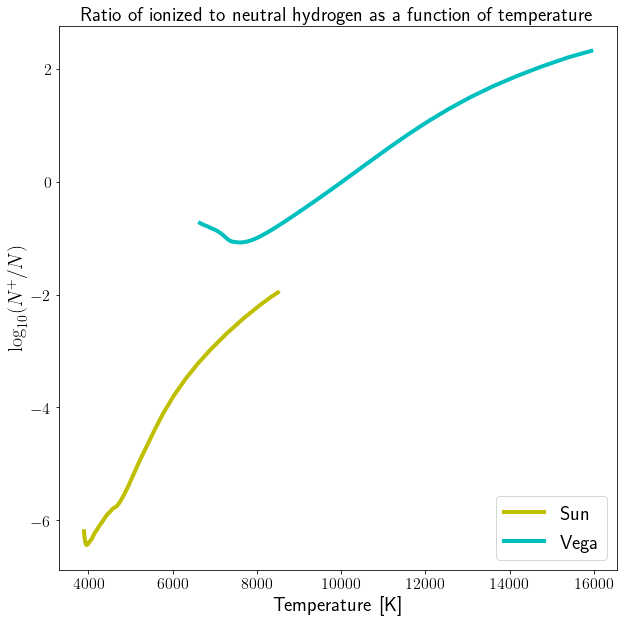

In [99]:
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
ax.plot(sun_temp, saha(sun_theta,sun_pressure), c='y', lw=4, label='Sun')
ax.plot(vega_temp, saha(vega_theta,vega_pressure), c='c', lw=4, label='Vega')
ax.set_title('Ratio of ionized to neutral hydrogen as a function of temperature', fontsize=20)
ax.set_xlabel('Temperature [K]', fontsize=20)
ax.set_ylabel('$\log_{10}(N^+/N)$', fontsize=20)
ax.tick_params(labelsize=16)
ax.legend(loc=4, fontsize=20)

# plt.savefig('sun+vega.pdf')